In [280]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

## Data Collection

In [281]:
churn_df = pd.read_csv('telecom_churn_data.csv')
churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [282]:
churn_df.shape

(99999, 226)

In [283]:
churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Data Cleanup

In [284]:
churn_df_clean = churn_df.copy()

- Filter high value customers
- Create a new column of average recharge in jun and july month

In [285]:
churn_df_clean['avg_rech_amt_6_7'] = (churn_df_clean['total_rech_amt_6'] + churn_df_clean['total_rech_amt_7'])/2

X = churn_df_clean['avg_rech_amt_6_7'].quantile(0.7)
X

368.5

In [286]:
churn_df_clean = churn_df_clean[churn_df_clean['avg_rech_amt_6_7'] >= X]
churn_df_clean.shape

(30011, 227)

In [287]:
# function to find out null percent
def null_percent(df_name):
    tmp = round((df_name.isnull().sum() / df_name.shape[0]) * 100, 4)
    tmp = tmp[tmp > 0.0000]
    return tmp.sort_values(ascending=False)

In [288]:
null_cols = null_percent(churn_df_clean)

In [289]:
null_cols

fb_user_6               62.0239
total_rech_data_6       62.0239
arpu_2g_6               62.0239
arpu_3g_6               62.0239
max_rech_data_6         62.0239
                         ...   
loc_ic_t2o_mou           0.3799
loc_og_t2o_mou           0.3799
date_of_last_rech_7      0.3799
date_of_last_rech_6      0.2066
last_date_of_month_7     0.1033
Length: 166, dtype: float64

* getting all the cols where the null is greater than 30%

In [290]:
null_cols_gt30 = null_cols[null_cols > 30.0000].index.to_list()
null_cols_gt30

['fb_user_6',
 'total_rech_data_6',
 'arpu_2g_6',
 'arpu_3g_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'av_rech_amt_data_6',
 'count_rech_3g_6',
 'night_pck_user_6',
 'date_of_last_rech_data_6',
 'arpu_2g_9',
 'night_pck_user_9',
 'fb_user_9',
 'date_of_last_rech_data_9',
 'arpu_3g_9',
 'av_rech_amt_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_3g_9',
 'count_rech_2g_9',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'fb_user_7',
 'date_of_last_rech_data_7',
 'count_rech_3g_7',
 'count_rech_2g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'max_rech_data_8',
 'total_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'arpu_2g_8',
 'av_rech_amt_data_8',
 'arpu_3g_8']

* dropping cols where null count is greater than 30%

In [291]:
churn_df_clean.drop(null_cols_gt30, axis=1, inplace=True)

In [292]:
churn_df_clean.shape

(30011, 187)

- Selecting cols where the null percentage is greater than 5
- By providing a specified threadhold percentage, in whichever rows, the null columns have NULL value TOGETHER, only dropping those ROWS. 

In [293]:
# function to clean null values in ROWS
def null_cleaner(df, percentage):
    null_cols = null_percent(df)

    tmp = null_cols[null_cols > float(percentage)]
    null_cols_gt_percentage = tmp.index.to_list()

    print(df[~df[null_cols_gt_percentage].isna().all(axis=1)].shape)

    null_cols = null_percent(df[~df[null_cols_gt_percentage].isna().all(axis=1)])
    print(null_cols)

    return df[~df[null_cols_gt_percentage].isna().all(axis=1)]

In [294]:
churn_df_clean = null_cleaner(churn_df_clean, 5.0000)

(28307, 187)
date_of_last_rech_8    1.0775
date_of_last_rech_9    1.0421
spl_ic_mou_8           0.5546
std_ic_t2o_mou_8       0.5546
loc_og_t2t_mou_8       0.5546
                        ...  
loc_og_t2t_mou_7       0.2296
spl_ic_mou_7           0.2296
onnet_mou_7            0.2296
date_of_last_rech_7    0.2049
date_of_last_rech_6    0.1696
Length: 91, dtype: float64


* Now selecting cols where the null percentage is greater than 1

In [295]:
churn_df_clean = null_cleaner(churn_df_clean, 1.0000)

(28263, 187)
date_of_last_rech_8    0.9235
date_of_last_rech_9    0.8881
spl_ic_mou_8           0.5449
std_ic_t2o_mou_8       0.5449
loc_og_t2t_mou_8       0.5449
                        ...  
loc_og_t2t_mou_7       0.2264
spl_ic_mou_7           0.2264
onnet_mou_7            0.2264
date_of_last_rech_7    0.1911
date_of_last_rech_6    0.1521
Length: 91, dtype: float64


* Dropping date cols as we do not need them for analysis

In [296]:
tmp = [i for i in churn_df_clean.columns.to_list() if 'date' in i]
print(tmp)
print(len(tmp))

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
8


In [297]:
churn_df_clean = churn_df_clean.drop(tmp, axis=1)
churn_df_clean.shape

(28263, 179)

In [298]:
# cols with single value

tmp = []
for i in churn_df_clean.columns.to_list():
    if len(churn_df_clean[i].value_counts()) == 1:
        tmp.append(i)
        print(i)

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9


* Dropping cols with single values, as they will not help in the analysis

In [299]:
churn_df_clean = churn_df_clean.drop(tmp, axis=1)
churn_df_clean.shape

(28263, 167)

In [300]:
null_percent(churn_df_clean)

ic_others_8         0.5449
std_ic_t2m_mou_8    0.5449
std_ic_t2f_mou_8    0.5449
std_ic_mou_8        0.5449
loc_og_t2t_mou_8    0.5449
                     ...  
roam_og_mou_7       0.2264
loc_og_t2t_mou_7    0.2264
loc_og_t2m_mou_7    0.2264
std_ic_t2f_mou_7    0.2264
std_ic_mou_7        0.2264
Length: 81, dtype: float64

* Imputing rest of the null cols with their MODE value

In [301]:
for i in null_percent(churn_df_clean).index.tolist():
    mode_value = churn_df_clean[i].mode()[0]
    churn_df_clean[i].fillna(mode_value, inplace=True)

In [302]:
null_percent(churn_df_clean)

Series([], dtype: float64)

>> There is no NULL Value anymore

### Tag churners

Tagging the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

In [303]:
churn_df_clean['churn'] = np.where((churn_df_clean['total_ic_mou_9']==0) & (churn_df_clean['total_og_mou_9']==0) & (churn_df_clean['vol_2g_mb_9']==0) & (churn_df_clean['vol_3g_mb_9']==0), 1, 0)
churn_df_clean.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


* Dropping all the cols from the churn phase which is September

In [304]:
churn_9 = [i for i in churn_df_clean.columns.to_list() if ("_9" in i) or ("sep" in i)]
print(churn_9)


['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'sep_vbc_3g']


In [305]:
# delete churn phase cols
churn_df_clean = churn_df_clean.drop(churn_9, axis=1)

In [306]:
churn_df_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28263 entries, 8 to 99997
Data columns (total 127 columns):
 #    Column              Dtype  
---   ------              -----  
 0    mobile_number       int64  
 1    arpu_6              float64
 2    arpu_7              float64
 3    arpu_8              float64
 4    onnet_mou_6         float64
 5    onnet_mou_7         float64
 6    onnet_mou_8         float64
 7    offnet_mou_6        float64
 8    offnet_mou_7        float64
 9    offnet_mou_8        float64
 10   roam_ic_mou_6       float64
 11   roam_ic_mou_7       float64
 12   roam_ic_mou_8       float64
 13   roam_og_mou_6       float64
 14   roam_og_mou_7       float64
 15   roam_og_mou_8       float64
 16   loc_og_t2t_mou_6    float64
 17   loc_og_t2t_mou_7    float64
 18   loc_og_t2t_mou_8    float64
 19   loc_og_t2m_mou_6    float64
 20   loc_og_t2m_mou_7    float64
 21   loc_og_t2m_mou_8    float64
 22   loc_og_t2f_mou_6    float64
 23   loc_og_t2f_mou_7    float64
 24   

we can see that all the columns are numerical, but churn should be a object value, so lets change their type as object. And also drop Mobile Number as we dont need it for analysis

In [307]:
churn_df_clean.drop('mobile_number', axis=1, inplace=True)
churn_df_clean['churn'] = churn_df_clean['churn'].astype(object)

In [308]:
churn_df_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28263 entries, 8 to 99997
Data columns (total 126 columns):
 #    Column              Dtype  
---   ------              -----  
 0    arpu_6              float64
 1    arpu_7              float64
 2    arpu_8              float64
 3    onnet_mou_6         float64
 4    onnet_mou_7         float64
 5    onnet_mou_8         float64
 6    offnet_mou_6        float64
 7    offnet_mou_7        float64
 8    offnet_mou_8        float64
 9    roam_ic_mou_6       float64
 10   roam_ic_mou_7       float64
 11   roam_ic_mou_8       float64
 12   roam_og_mou_6       float64
 13   roam_og_mou_7       float64
 14   roam_og_mou_8       float64
 15   loc_og_t2t_mou_6    float64
 16   loc_og_t2t_mou_7    float64
 17   loc_og_t2t_mou_8    float64
 18   loc_og_t2m_mou_6    float64
 19   loc_og_t2m_mou_7    float64
 20   loc_og_t2m_mou_8    float64
 21   loc_og_t2f_mou_6    float64
 22   loc_og_t2f_mou_7    float64
 23   loc_og_t2f_mou_8    float64
 24   

In [309]:
# list of numerical columns
ncols = churn_df_clean.select_dtypes(exclude=['object']).columns
print(ncols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=125)


* Capping outliers using 10% - 90% quantile and 1.5 X IQR 

In [310]:
# removing outliers by below 5% and above 95%
for i in ncols: 
    q1 = churn_df_clean[i].quantile(0.10)
    q3 = churn_df_clean[i].quantile(0.90)
    iqr = q3-q1
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    df = churn_df_clean.loc[(churn_df_clean[i] > low) & (churn_df_clean[i] < high)]

churn_df_clean = df.copy()
churn_df_clean.shape

(27974, 126)

## EDA

In [311]:
churn_df_eda = churn_df_clean.copy()

### Univariate Analysis

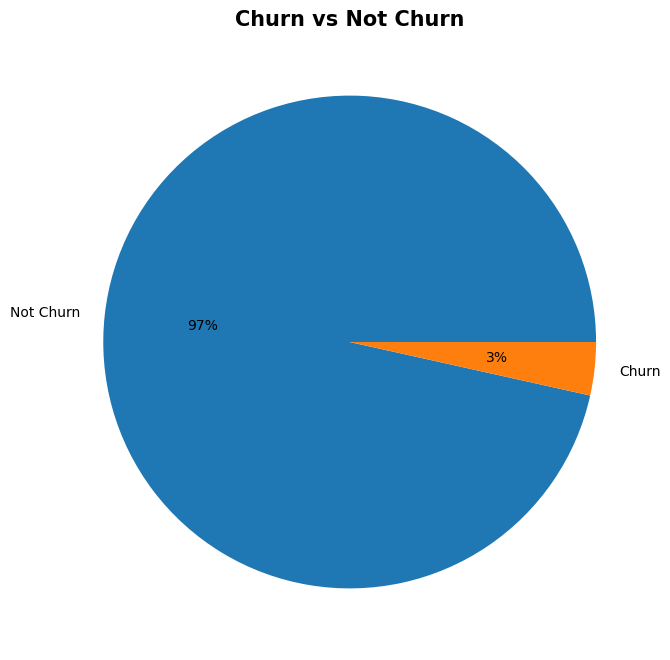

In [312]:
# plot pie
plt.pie(churn_df_eda['churn'].value_counts(), labels=['Not Churn', 'Churn'], autopct='%.0f%%')
plt.title('Churn vs Not Churn', fontdict={'fontsize': '15', 'fontweight': 'bold'})
plt.show()

- 97% of customers have not churned

- Only 3% churned customers are present in the dataset

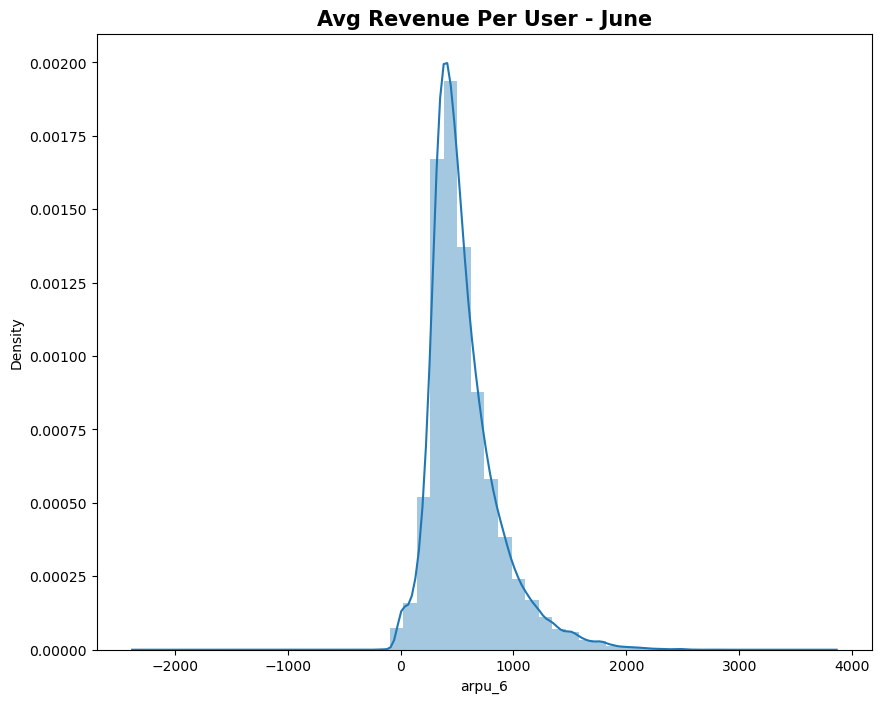

In [313]:
# plot distribution plot
sns.distplot(churn_df_eda['arpu_6'])
plt.title('Avg Revenue Per User - June', fontdict={'fontsize': '15', 'fontweight': 'bold'})
plt.show()

- The average revenue per user for the month of June, is distrubed in the range of 0 - 2000, where most of the concentration can be seen in around 500.

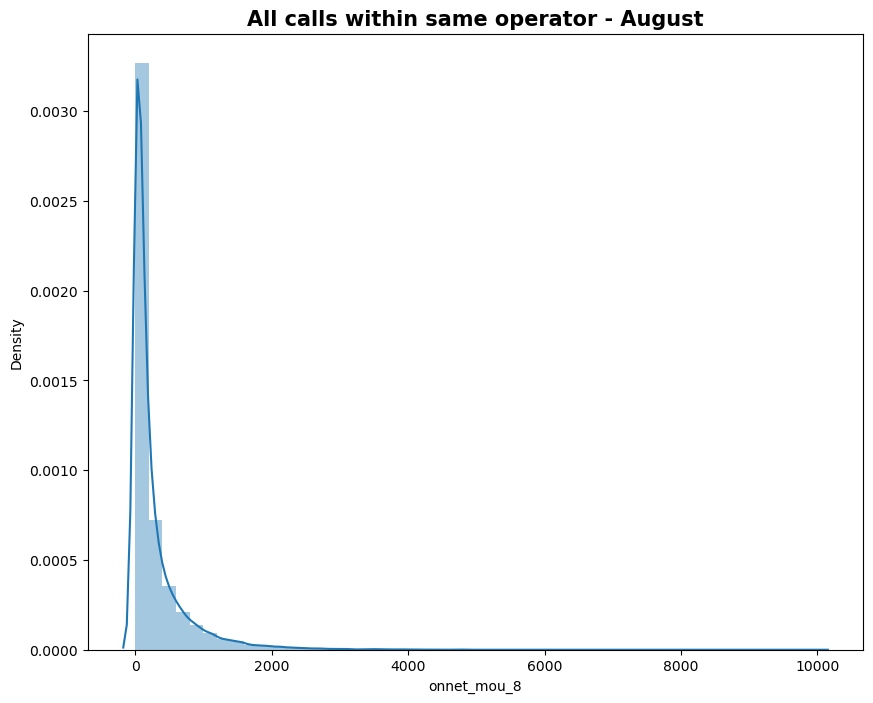

In [314]:
# plot distribution plot
sns.distplot(churn_df_eda['onnet_mou_8'])
plt.title('All calls within same operator - August', fontdict={'fontsize': '15', 'fontweight': 'bold'})
plt.show()

- All the calls withing same operator per user for the month of August, is distrubed in the range of 0 - 2000, where most of the concentration can be seen in around 0-200.

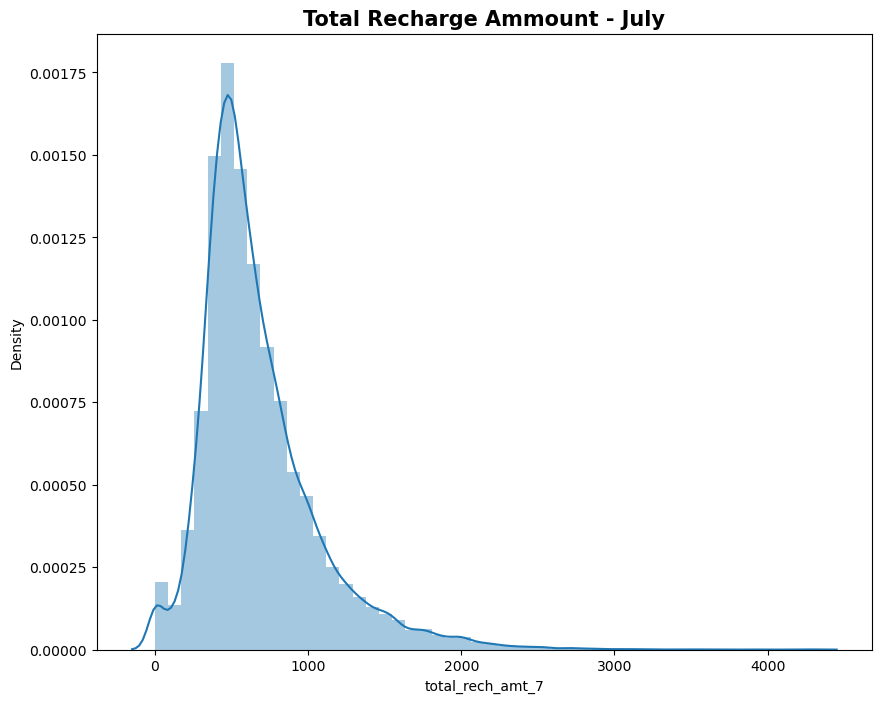

In [315]:
# plot distribution plot
sns.distplot(churn_df_eda['total_rech_amt_7'])
plt.title('Total Recharge Ammount - July', fontdict={'fontsize': '15', 'fontweight': 'bold'})
plt.show()

- The total recharge ammount per user for the month of July, is distrubed in the range of 0 - 3000, where most of the concentration can be seen in around 500-800.

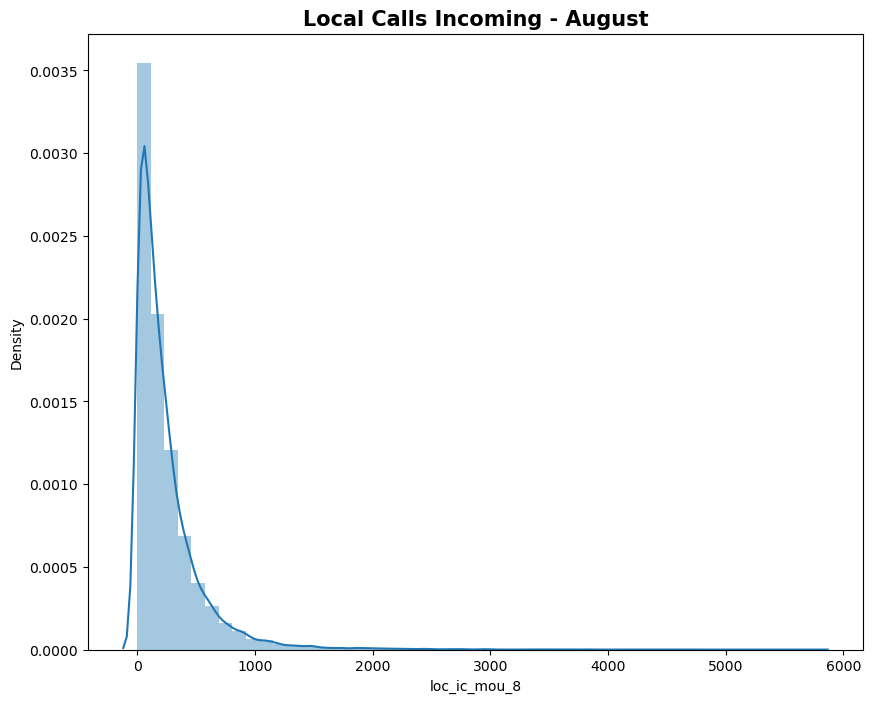

In [316]:
# plot distribution plot
sns.distplot(churn_df_eda['loc_ic_mou_8'])
plt.title('Local Calls Incoming - August', fontdict={'fontsize': '15', 'fontweight': 'bold'})
plt.show()

- The total number of incoming calls per user for the month of August, is distrubed in the range of 0 - 2000, where most of the concentration can be seen in around 0-200.

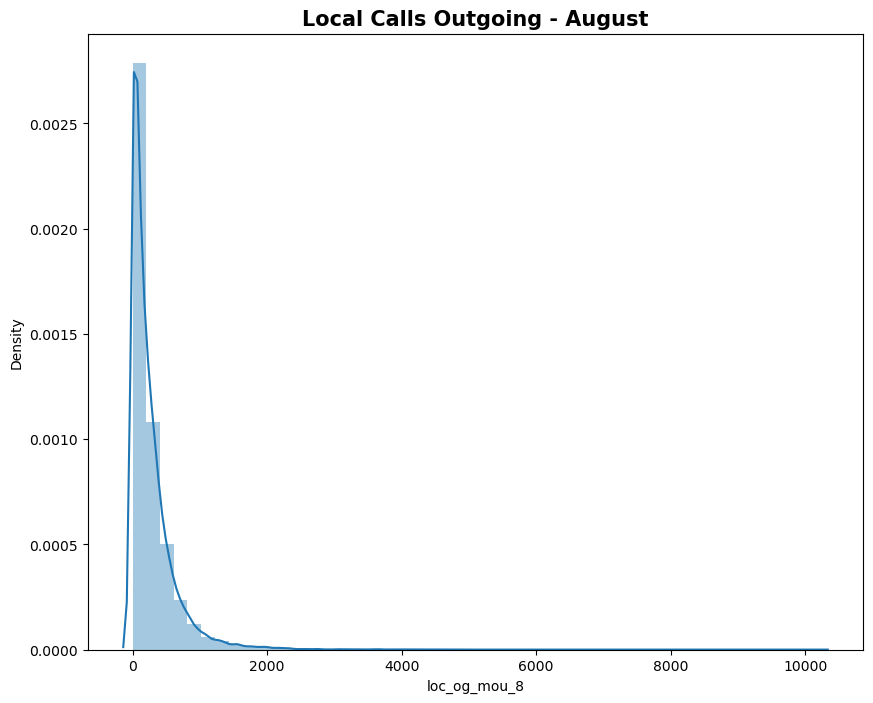

In [317]:
# plot distribution plot
sns.distplot(churn_df_eda['loc_og_mou_8'])
plt.title('Local Calls Outgoing - August', fontdict={'fontsize': '15', 'fontweight': 'bold'})
plt.show()

- The total number of outgoing calls per user for the month of August, is distrubed in the range of 0 - 2200, where most of the concentration can be seen in around 0-200.

### Bivariate Analysis

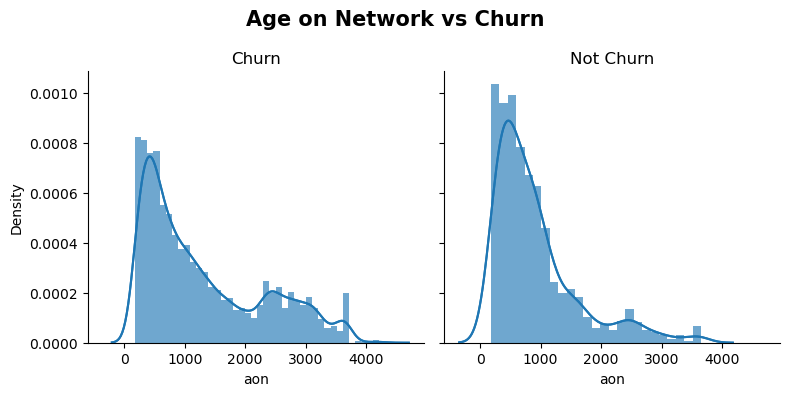

In [318]:
# plot distribution plot
grid = sns.FacetGrid(churn_df_eda, col='churn', height=4)
grid.map(sns.distplot, 'aon')
grid.axes[0, 0].set_title('Churn')
grid.map(sns.distplot, 'aon')
grid.axes[0, 1].set_title('Not Churn')
plt.subplots_adjust(top=1)
plt.suptitle('Age on Network vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

- Distribution of the customers who have not churned, have been slighly more concentrated in the range of 0-2000 compared to the customers, who have churned.

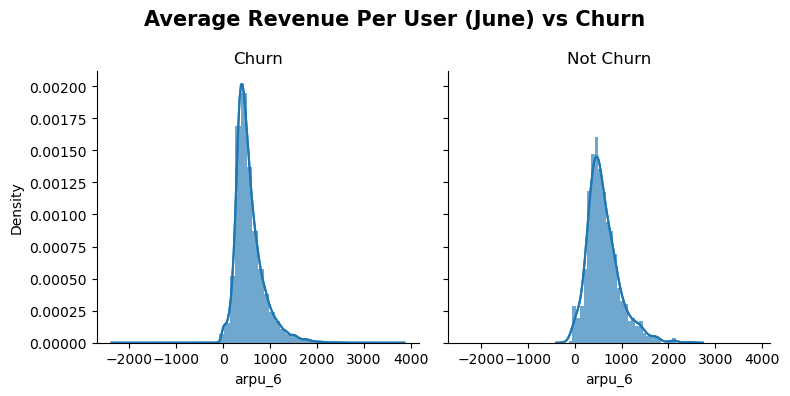

In [319]:
# plot distribution plot
grid = sns.FacetGrid(churn_df_eda, col='churn', height=4)
grid.map(sns.distplot, 'arpu_6')
grid.axes[0, 0].set_title('Churn')
grid.map(sns.distplot, 'arpu_6')
grid.axes[0, 1].set_title('Not Churn')
plt.subplots_adjust(top=1)
plt.suptitle('Average Revenue Per User (June) vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

- Distribution of Average revenue per user (June) for both of the customers who have churned and not churned, are concentrated in the range of 0-2200.
- There is no significant insight to be seen.

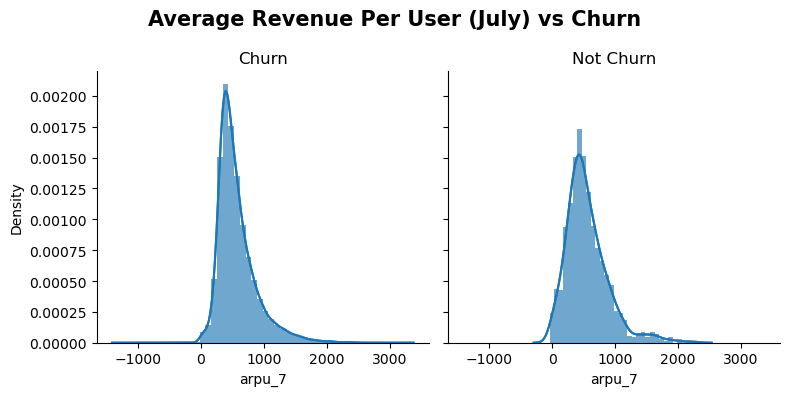

In [320]:
# plot distribution plot
grid = sns.FacetGrid(churn_df_eda, col='churn', height=4)
grid.map(sns.distplot, 'arpu_7')
grid.axes[0, 0].set_title('Churn')
grid.map(sns.distplot, 'arpu_7')
grid.axes[0, 1].set_title('Not Churn')
plt.subplots_adjust(top=1)
plt.suptitle('Average Revenue Per User (July) vs Churn', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

- Distribution of Average revenue per user (July) for both of the customers who have churned and not churned, are concentrated in the range of 0-2200.
- There is no significant insight to be seen.

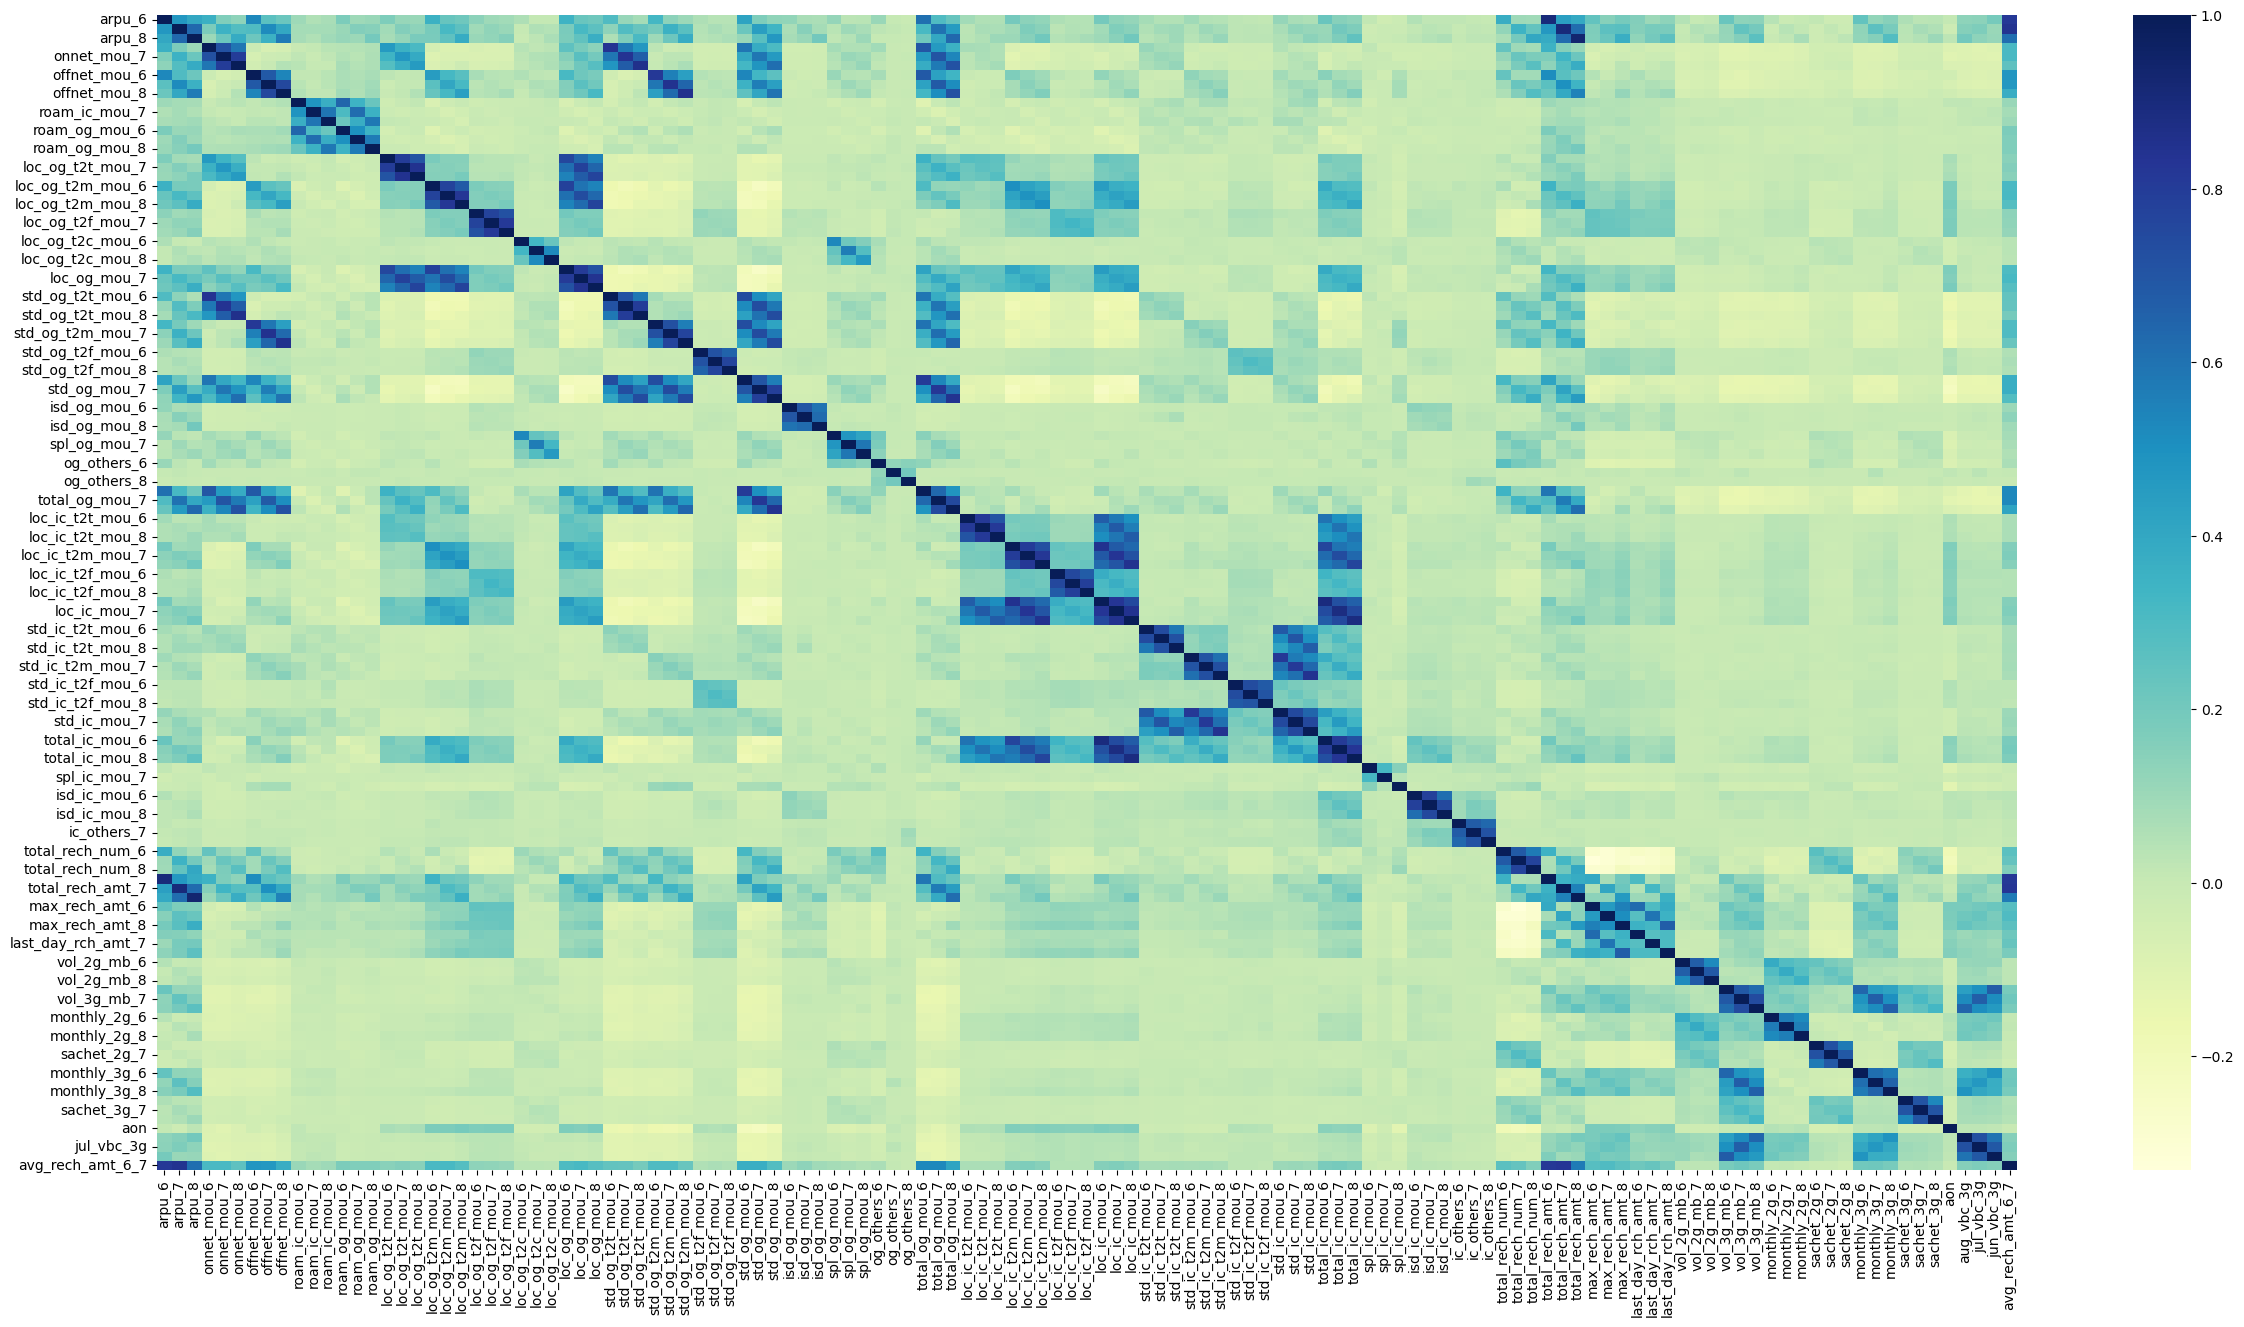

In [321]:
# plot heatmap
plt.figure(figsize = (30,15))
sns.heatmap(data=churn_df_eda.corr(), annot=False, cmap='YlGnBu')
plt.show()

- There is no visible insight that we can gather from this heatmap of all the numerical variables

In [322]:
churn_df_clean.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
arpu_6,1.000000,0.474061,0.400131,0.365399,0.167875,0.135385,0.529293,0.266787,0.223147,0.099846,...,0.122463,0.152257,0.063118,0.030669,0.034944,0.012024,0.132823,0.137252,0.189156,0.813114
arpu_7,0.474061,1.000000,0.633171,0.174745,0.354773,0.286959,0.296890,0.521347,0.397683,0.081628,...,0.256670,0.187873,0.036239,0.079630,0.056735,-0.019948,0.157415,0.173358,0.107668,0.838904
arpu_8,0.400131,0.633171,1.000000,0.104698,0.223222,0.383542,0.217394,0.356084,0.571770,0.077936,...,0.155217,0.284346,0.030289,0.052982,0.102412,0.026850,0.202022,0.134743,0.112397,0.612878
onnet_mou_6,0.365399,0.174745,0.104698,1.000000,0.714855,0.585952,-0.014476,-0.068215,-0.054857,0.000562,...,-0.092270,-0.084445,-0.036616,-0.041494,-0.037251,-0.088767,-0.094093,-0.102459,-0.095945,0.309212
onnet_mou_7,0.167875,0.354773,0.223222,0.714855,1.000000,0.801477,-0.057379,-0.019105,-0.015415,0.020635,...,-0.087585,-0.084504,-0.037702,-0.036997,-0.031271,-0.103235,-0.094652,-0.101116,-0.103212,0.308719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aon,0.012024,-0.019948,0.026850,-0.088767,-0.103235,-0.079500,-0.036502,-0.061936,-0.031420,0.019148,...,0.026394,0.035600,-0.037207,-0.038753,-0.036449,1.000000,0.025641,0.027237,0.022484,0.000999
aug_vbc_3g,0.132823,0.157415,0.202022,-0.094093,-0.094652,-0.080052,-0.078354,-0.081969,-0.051257,0.018674,...,0.413009,0.486390,0.078484,0.075966,0.073330,0.025641,1.000000,0.719583,0.595658,0.157106
jul_vbc_3g,0.137252,0.173358,0.134743,-0.102459,-0.101116,-0.089474,-0.089352,-0.092042,-0.065646,0.007680,...,0.465130,0.399745,0.095530,0.088724,0.070177,0.027237,0.719583,1.000000,0.693032,0.168883
jun_vbc_3g,0.189156,0.107668,0.112397,-0.095945,-0.103212,-0.088678,-0.076717,-0.091340,-0.066504,0.011636,...,0.375494,0.365987,0.088117,0.082210,0.067768,0.022484,0.595658,0.693032,1.000000,0.156083


## Model Building

In [323]:
churn_df_model = churn_df_clean.copy()

- Dataset split in Predictor and Target variables

In [324]:
X = churn_df_model.drop(['churn'], axis=1)
y = churn_df_model['churn'].astype('int64')

Train-Test Split with 75% Train Data

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=51)

Dealing with imbalance

In [326]:
# Init SMOTE
smt = SMOTE(random_state=51)

# Fitting SMOTE to the train set
X_train, y_train = smt.fit_resample(X_train, y_train)

Feature Scalling using StandardScaler

In [327]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
0,170.486,718.381,480.565,342.36,1815.18,1151.14,19.98,20.29,20.96,0.00,...,0,0,0,0,0,488,0.00,0.0,0.0,511.0
1,886.477,802.324,597.315,17.86,3.28,5.08,634.74,727.36,509.56,2.13,...,0,0,0,0,0,189,0.00,0.0,0.0,964.5
2,1163.302,718.646,971.422,123.71,101.88,184.16,262.71,355.79,454.58,0.00,...,1,1,0,0,1,342,213.01,0.0,0.0,1153.0
3,414.294,346.424,380.756,693.49,552.71,473.38,123.86,59.58,91.04,0.00,...,0,0,0,0,0,2936,0.00,0.0,0.0,417.0
4,492.372,617.902,532.372,76.53,127.16,101.41,296.81,485.69,387.94,28.11,...,0,0,0,0,0,2010,0.00,0.0,0.0,675.0


In [328]:
# numerical columns
ncols = X_train.columns.to_list()

In [329]:
# scalling cols which are not dummuy variables and not categorical variables

# scaler initiation
scaler = StandardScaler()

# fit transforming train dataset
X_train[ncols] = scaler.fit_transform(X_train[ncols])

In [330]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
0,-1.311400,0.554618,0.191832,-0.076059,3.128578,2.330350,-0.879415,-0.824203,-0.643990,-0.272798,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,-0.710284,-0.257600,-0.27085,-0.265425,-0.520809
1,0.994489,0.830028,0.515151,-0.720922,-0.704031,-0.531072,0.388056,0.625685,0.539116,-0.249665,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,-1.057687,-0.257600,-0.27085,-0.265425,0.985768
2,1.886019,0.555487,1.551176,-0.510572,-0.495468,-0.083955,-0.378970,-0.136241,0.405987,-0.272798,...,2.106463,2.161447,-0.132575,-0.136683,1.211264,-0.879919,0.469743,-0.27085,-0.265425,1.611986
3,-0.526203,-0.665746,-0.084572,0.621725,0.458147,0.638155,-0.665242,-0.743637,-0.474297,-0.272798,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,2.133998,-0.257600,-0.27085,-0.265425,-0.833087
4,-0.274748,0.224953,0.335303,-0.604330,-0.441995,-0.290561,-0.308665,0.130126,0.244623,0.032498,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,1.058097,-0.257600,-0.27085,-0.265425,0.024017


In [331]:
# only transforming test dataset without fitting
X_test[ncols] = scaler.transform(X_test[ncols])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
22589,-0.883137,-0.834674,0.601657,-0.756415,-0.700583,-0.528376,-0.813790,-0.805707,1.098997,-0.272798,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,-0.692856,1.436859,3.968279,6.600278,-0.829765
43823,-0.872290,-0.250459,-0.209505,-0.755799,-0.710969,-0.540485,-0.607823,-0.399081,-0.135007,-0.272798,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,1.242836,-0.146489,-0.160185,-0.016392,-0.703525
64612,-0.544141,0.016697,-1.136130,-0.291835,-0.550338,-0.543756,0.424487,0.301286,-0.693508,-0.272798,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,-0.702151,-0.257600,-0.270850,-0.265425,-0.507521
23375,2.700481,3.064421,2.623648,-0.720028,-0.668791,-0.447556,-0.550300,-0.501978,-0.177794,-0.272798,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,-0.006185,-0.176025,-0.158038,-0.080646,3.575353
31479,0.366055,0.096607,0.058043,-0.177210,-0.038872,0.185944,1.505969,0.940589,0.544080,-0.272798,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,0.137888,-0.257600,-0.270850,-0.265425,0.412704


### Model with PCA

In [332]:
# init PCA
pca = PCA(random_state=51)

# fitting train dataset on PCA
pca.fit(X_train)

# list principal components
pca.components_

array([[ 6.91937291e-02,  1.19183912e-01,  1.57584805e-01, ...,
         6.93062517e-02,  6.55570538e-02,  1.11470566e-01],
       [ 1.32747056e-01,  1.74728506e-01,  1.05904796e-01, ...,
        -7.22566515e-02, -7.15427599e-02,  1.86190017e-01],
       [ 7.71824135e-02,  1.51165623e-01,  1.63100614e-01, ...,
         2.08081062e-01,  1.99629421e-01,  1.40070722e-01],
       ...,
       [-2.30476337e-07,  1.32274003e-07,  5.14705250e-07, ...,
         7.56639095e-09, -2.67652048e-08, -3.75771581e-04],
       [-4.38272535e-07,  1.12576264e-08, -1.00055294e-07, ...,
         1.37921231e-07, -7.79067717e-08, -6.76278301e-05],
       [ 8.97285071e-08, -1.28054603e-07, -1.14871842e-07, ...,
         7.90794497e-08,  5.95355625e-08,  1.50418508e-05]])

In [333]:
# finding out cumulative variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
pd.DataFrame(cumulative_var).loc[50:70]

,0
50,0.899613
51,0.903414
52,0.907193
53,0.910881
54,0.914540
55,0.917984
56,0.921362
57,0.924621
58,0.927779
59,0.930910


In [334]:
# finding out the selected components name
selected_components = pca.components_[:51]
selected_pca_component_names = df.columns[np.argmax(np.abs(selected_components), axis=1)]
selected_pca_component_names

Index(['total_ic_mou_8', 'std_og_mou_7', 'vol_3g_mb_7', 'std_ic_mou_7',
       'roam_og_mou_7', 'onnet_mou_6', 'offnet_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'std_og_t2f_mou_7', 'isd_ic_mou_7', 'monthly_2g_7',
       'std_og_t2f_mou_7', 'spl_og_mou_7', 'loc_og_t2m_mou_7', 'isd_og_mou_7',
       'total_rech_num_7', 'max_rech_amt_7', 'isd_ic_mou_7',
       'std_ic_t2t_mou_7', 'sachet_3g_7', 'sachet_2g_7', 'std_ic_t2f_mou_6',
       'og_others_7', 'og_others_8', 'roam_ic_mou_8', 'roam_og_mou_6',
       'spl_ic_mou_6', 'spl_ic_mou_6', 'loc_og_t2m_mou_7', 'std_ic_mou_8',
       'spl_ic_mou_7', 'spl_ic_mou_7', 'std_og_t2m_mou_8', 'og_others_6',
       'spl_ic_mou_8', 'aon', 'og_others_8', 'og_others_8', 'og_others_7',
       'aon', 'aug_vbc_3g', 'last_day_rch_amt_6', 'og_others_6', 'vol_2g_mb_6',
       'loc_og_t2c_mou_8', 'std_ic_mou_7', 'sachet_3g_8', 'isd_og_mou_8',
       'last_day_rch_amt_7', 'std_og_t2f_mou_6'],
      dtype='object')

- 51 components explains 90% of the data
- 66 components explains 95% of the data

we will use 51 pca components for our model Building

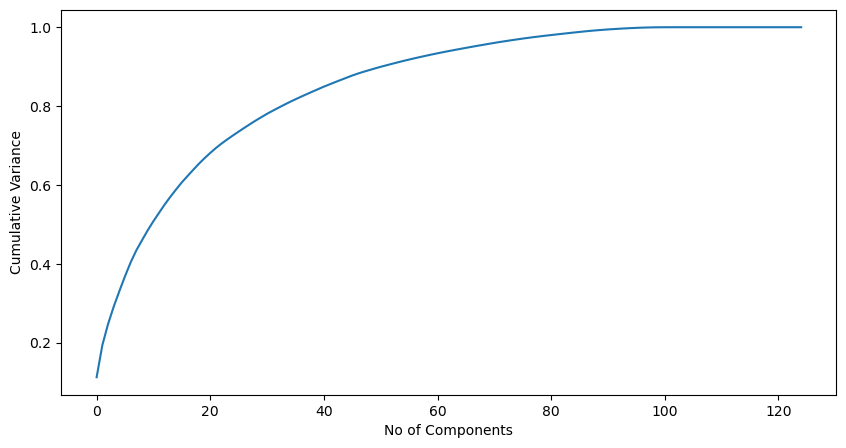

In [335]:
# plotting scree plot
fig = plt.figure(figsize = (10,5))
plt.plot(cumulative_var)
plt.xlabel('No of Components')
plt.ylabel('Cumulative Variance')
plt.show()

#### Logistic Regression - PCA

In [336]:
X_train.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=125)

In [337]:
# using 51 pca components for model building
pca_w51 = IncrementalPCA(n_components=51)

In [338]:
# fit_transform X_train with pca 51 components
X_train_pca = pca_w51.fit_transform(X_train)

In [339]:
# transform X_test with pca 51 components
X_test_pca = pca_w51.transform(X_test)

#### Tuning hyperparameter  C
In logistic regression, C represents the inverse of the regularization strength. When C is set to higher values, it indicates a lower degree of regularization.

In [340]:
# KFold object with 5 splits
k_fold = KFold(n_splits=5, shuffle=True, random_state=51)

# params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# setting score as recall for getting higher sensitivity
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = k_fold, 
                        verbose = 1,
                        return_train_score=True) 

# model fit
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=51, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [341]:
# model results
model_result = pd.DataFrame(model_cv.cv_results_)
model_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.140135,0.019636,0.002659,0.000157,0.01,{'C': 0.01},0.882045,0.882644,0.891509,0.885630,...,0.885522,0.003356,6,0.888540,0.888711,0.885395,0.888834,0.884592,0.887214,0.001833
1,0.286612,0.092524,0.002524,0.000022,0.1,{'C': 0.1},0.883791,0.883387,0.893496,0.885630,...,0.886806,0.003681,5,0.888725,0.889328,0.885889,0.888958,0.885583,0.887696,0.001615
2,0.245575,0.020993,0.003386,0.001575,1,{'C': 1},0.883541,0.884130,0.894737,0.884890,...,0.887054,0.004134,4,0.889525,0.888957,0.886259,0.889328,0.885955,0.888005,0.001563
3,0.258818,0.007536,0.003070,0.000838,10,{'C': 10},0.884289,0.884130,0.893992,0.885137,...,0.887250,0.003756,3,0.889525,0.889019,0.886259,0.889452,0.885831,0.888017,0.001625
4,0.276109,0.020498,0.003391,0.001463,100,{'C': 100},0.884289,0.884377,0.894489,0.885137,...,0.887544,0.003955,1,0.889525,0.889081,0.886197,0.889328,0.885769,0.887980,0.001642
5,0.257747,0.007950,0.003580,0.001110,1000,{'C': 1000},0.884289,0.884130,0.894240,0.885137,...,0.887396,0.003885,2,0.889587,0.889081,0.886135,0.889143,0.886017,0.887993,0.001575


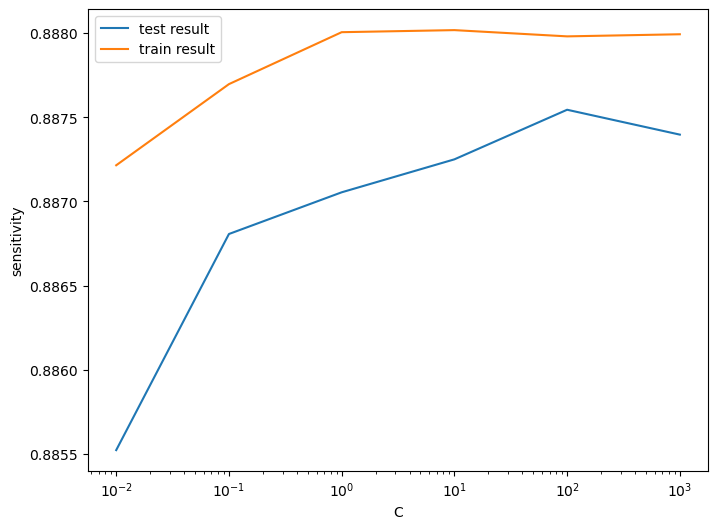

In [342]:
# plot C vs train-validation score

plt.figure(figsize=(8, 6))
plt.plot(model_result['param_C'], model_result['mean_test_score'])
plt.plot(model_result['param_C'], model_result['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [343]:
# best score with best C score
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print("Best Score => {0} C => {1}".format(round(best_score, 3), best_C))

Best Score => 0.888 C => 100


#### Logistic regression with optimal C

In [344]:
# Init the model with the value of best C
logreg_pca = LogisticRegression(C=best_C)

In [345]:
# model fit on train dataset
logreg_pca_model = logreg_pca.fit(X_train_pca, y_train)

##### Prediction on the train set

In [346]:
# Predictions on the train dataset
y_train_pred = logreg_pca_model.predict(X_train_pca)

In [347]:
# Confusion matrix
conf_matrx = metrics.confusion_matrix(y_train, y_train_pred)
print(conf_matrx)

[[16788  3461]
 [ 2271 17978]]


In [348]:
TP = conf_matrx[1,1] # true positive 
TN = conf_matrx[0,0] # true negative
FP = conf_matrx[0,1] # false positive
FN = conf_matrx[1,0] # false negative

In [349]:
# Accuracy
print("Accuracy ==> ", metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity ==> ", TP / float(TP+FN))

# Specificity
print("Specificity ==> ", TN / float(TN+FP))

Accuracy ==>  0.8584621462788286
Sensitivity ==>  0.8878463133981925
Specificity ==>  0.8290779791594647


##### Prediction on the test set

In [350]:
# Predictions on the test dataset
y_test_pred = logreg_pca_model.predict(X_test_pca)

In [351]:
# Confusion matrix
conf_matrx = metrics.confusion_matrix(y_test, y_test_pred)
print(conf_matrx)

[[5555 1195]
 [  42  202]]


In [352]:
TP = conf_matrx[1,1] # true positive 
TN = conf_matrx[0,0] # true negative
FP = conf_matrx[0,1] # false positive
FN = conf_matrx[1,0] # false negative

In [353]:
# Accuracy
print("Accuracy ==> ", metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity ==> ", TP / float(TP+FN))

# Specificity
print("Specificity ==> ", TN / float(TN+FP))

Accuracy ==>  0.8231341149556763
Sensitivity ==>  0.8278688524590164
Specificity ==>  0.822962962962963


***Model summary***

- Train set
    - Accuracy = 0.858
    - Sensitivity = 0.888
    - Specificity = 0.829
- Test set
    - Accuracy = 0.823
    - Sensitivity = 0.828
    - Specificity = 0.823
    
Model exhibits good performance train as well as test data set

#### Random forest - PCA

##### Hyperparameter tuning

In [354]:
X_train

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7
0,-1.311400,0.554618,0.191832,-0.076059,3.128578,2.330350,-0.879415,-0.824203,-0.643990,-0.272798,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,-0.710284,-0.257600,-0.270850,-0.265425,-0.520809
1,0.994489,0.830028,0.515151,-0.720922,-0.704031,-0.531072,0.388056,0.625685,0.539116,-0.249665,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,-1.057687,-0.257600,-0.270850,-0.265425,0.985768
2,1.886019,0.555487,1.551176,-0.510572,-0.495468,-0.083955,-0.378970,-0.136241,0.405987,-0.272798,...,2.106463,2.161447,-0.132575,-0.136683,1.211264,-0.879919,0.469743,-0.270850,-0.265425,1.611986
3,-0.526203,-0.665746,-0.084572,0.621725,0.458147,0.638155,-0.665242,-0.743637,-0.474297,-0.272798,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,2.133998,-0.257600,-0.270850,-0.265425,-0.833087
4,-0.274748,0.224953,0.335303,-0.604330,-0.441995,-0.290561,-0.308665,0.130126,0.244623,0.032498,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,1.058097,-0.257600,-0.270850,-0.265425,0.024017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40493,-0.740292,-0.569475,-0.605923,-0.470133,-0.458687,-0.372059,-0.492803,-0.466190,-0.651189,-0.272798,...,-0.229066,-0.219207,-0.132575,2.709272,-0.112903,-0.911290,-0.241070,-0.244519,-0.232515,-0.823178
40494,-0.743565,-0.681531,-0.026965,0.276794,0.407512,0.502797,-0.604269,-0.518921,-0.242081,-0.272798,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,0.579402,-0.257600,-0.270850,-0.265425,-0.648119
40495,-0.005415,-0.694322,-0.177290,-0.522014,-0.677003,-0.497833,-0.158221,-0.359282,-0.411921,0.555735,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,-0.509279,-0.248124,-0.270850,-0.265425,-0.698187
40496,-0.310937,0.647330,-0.575321,-0.703934,-0.545502,-0.490138,-0.243176,-0.033838,-0.479265,-0.075217,...,-0.229066,-0.219207,-0.132575,-0.136683,-0.112903,-0.812530,-0.257600,-0.260044,-0.265425,0.107267


In [355]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100],
    'max_features': [10, 20]
}

# init RandomForest Model
rf = RandomForestClassifier()

# Init GridSearchCV Model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# model Fit
grid_search.fit(X_train_pca, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100]},
             return_train_score=True, verbose=1)

In [356]:
# best score with best C score
best_score = grid_search.best_score_
best_C = grid_search.best_params_

print("Best Score => {0} C => {1}".format(round(best_score, 3), best_C))

Best Score => 0.843 C => {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [357]:
X_train_pca

array([[-2.16085512,  3.20849403,  0.19455498, ...,  0.52382043,
        -0.16597575,  0.36723606],
       [ 5.38683463, -2.67434292,  1.52848272, ...,  2.21089421,
         2.94026377, -0.15730748],
       [11.02212891, -3.63212591,  2.44212351, ...,  0.15218555,
         0.37941294,  0.33098448],
       ...,
       [-2.05585871, -2.58803951,  1.05734456, ...,  0.60689144,
        -0.1071094 , -0.18993427],
       [-0.10048124, -1.46154898,  0.72939281, ...,  0.32544752,
        -0.27209373, -0.47612061],
       [-3.53190982, -1.27848925, -1.2827619 , ...,  0.12590657,
        -0.09142555, -0.05796596]])

##### Model with optimal hyperparameters

In [358]:
# model with the most optimal hyperparameters

rf_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=100)

In [359]:
# model fit
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=100)

In [360]:
# feature importance
rf_model.feature_importances_

array([4.84200920e-01, 1.13008834e-01, 1.01422546e-02, 7.16713336e-02,
       5.53443374e-02, 3.28501219e-02, 1.22445893e-02, 8.75238148e-03,
       3.18796365e-03, 1.34304878e-03, 2.27780978e-02, 3.12324190e-03,
       5.38429125e-02, 2.21400019e-02, 1.49234099e-02, 5.54575560e-04,
       1.00420222e-02, 9.26833318e-03, 3.92098305e-04, 6.10409858e-03,
       6.17349146e-04, 1.87211816e-02, 1.62899659e-04, 2.55284809e-04,
       1.98051248e-04, 1.25936917e-03, 1.42847477e-03, 6.10130501e-04,
       6.90468907e-03, 8.33653198e-04, 4.73888561e-03, 2.85918164e-04,
       6.13741667e-04, 7.29117204e-03, 3.47200724e-03, 2.16642556e-03,
       1.02181263e-03, 7.42019752e-04, 1.74990671e-03, 5.30060774e-04,
       5.50646864e-04, 2.26558207e-04, 3.54308713e-04, 1.16226211e-04,
       5.05303903e-04, 1.71039692e-03, 5.94413162e-04, 1.35049511e-03,
       3.36904817e-04, 2.79095398e-03, 1.94618221e-03])

##### Prediction on the train set

In [361]:
# Predictions on the train dataset
y_train_pred = rf_model.predict(X_train_pca)

In [362]:
# Confusion matrix
conf_matrx = metrics.confusion_matrix(y_train, y_train_pred)
print(conf_matrx)

[[16758  3491]
 [ 2751 17498]]


In [363]:
TP = conf_matrx[1,1] # true positive 
TN = conf_matrx[0,0] # true negative
FP = conf_matrx[0,1] # false positive
FN = conf_matrx[1,0] # false negative

In [364]:
# Accuracy
print("Accuracy ==> ",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity ==> ",TP / float(TP+FN))

# Specificity
print("Specificity ==> ", TN / float(TN+FP))

Accuracy ==>  0.8458689317991012
Sensitivity ==>  0.8641414390834116
Specificity ==>  0.8275964245147909


##### Prediction on the test set

In [365]:
# Prediction on the test dataset
y_test_pred = rf_model.predict(X_test_pca)

In [366]:
# Confusion matrix
conf_matrx = metrics.confusion_matrix(y_test, y_test_pred)
print(conf_matrx)

[[5534 1216]
 [  49  195]]


In [367]:
TP = conf_matrx[1,1] # true positive 
TN = conf_matrx[0,0] # true negative
FP = conf_matrx[0,1] # false positive
FN = conf_matrx[1,0] # false negative

In [368]:
# Accuracy
print("Accuracy ==> ",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity ==> ",TP / float(TP+FN))

# Specificity
print("Specificity ==> ", TN / float(TN+FP))

Accuracy ==>  0.8191306834429511
Sensitivity ==>  0.7991803278688525
Specificity ==>  0.8198518518518518


***Model summary***

- Train set
    - Accuracy    = 0.846
    - Sensitivity = 0.864
    - Specificity = 0.828
- Test set
    - Accuracy    = 0.819
    - Sensitivity = 0.799
    - Specificity = 0.820
    
    
From the model result, it is visible that Sesitivity has been decreased after evaluating the model on the test set. But, the accuracy and specificity is good in the test set.

In [369]:
# predictors
selected_pca_component_names

Index(['total_ic_mou_8', 'std_og_mou_7', 'vol_3g_mb_7', 'std_ic_mou_7',
       'roam_og_mou_7', 'onnet_mou_6', 'offnet_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_7', 'std_og_t2f_mou_7', 'isd_ic_mou_7', 'monthly_2g_7',
       'std_og_t2f_mou_7', 'spl_og_mou_7', 'loc_og_t2m_mou_7', 'isd_og_mou_7',
       'total_rech_num_7', 'max_rech_amt_7', 'isd_ic_mou_7',
       'std_ic_t2t_mou_7', 'sachet_3g_7', 'sachet_2g_7', 'std_ic_t2f_mou_6',
       'og_others_7', 'og_others_8', 'roam_ic_mou_8', 'roam_og_mou_6',
       'spl_ic_mou_6', 'spl_ic_mou_6', 'loc_og_t2m_mou_7', 'std_ic_mou_8',
       'spl_ic_mou_7', 'spl_ic_mou_7', 'std_og_t2m_mou_8', 'og_others_6',
       'spl_ic_mou_8', 'aon', 'og_others_8', 'og_others_8', 'og_others_7',
       'aon', 'aug_vbc_3g', 'last_day_rch_amt_6', 'og_others_6', 'vol_2g_mb_6',
       'loc_og_t2c_mou_8', 'std_ic_mou_7', 'sachet_3g_8', 'isd_og_mou_8',
       'last_day_rch_amt_7', 'std_og_t2f_mou_6'],
      dtype='object')

In [370]:
# feature_importance
importance = rf_model.feature_importances_
importance

array([4.84200920e-01, 1.13008834e-01, 1.01422546e-02, 7.16713336e-02,
       5.53443374e-02, 3.28501219e-02, 1.22445893e-02, 8.75238148e-03,
       3.18796365e-03, 1.34304878e-03, 2.27780978e-02, 3.12324190e-03,
       5.38429125e-02, 2.21400019e-02, 1.49234099e-02, 5.54575560e-04,
       1.00420222e-02, 9.26833318e-03, 3.92098305e-04, 6.10409858e-03,
       6.17349146e-04, 1.87211816e-02, 1.62899659e-04, 2.55284809e-04,
       1.98051248e-04, 1.25936917e-03, 1.42847477e-03, 6.10130501e-04,
       6.90468907e-03, 8.33653198e-04, 4.73888561e-03, 2.85918164e-04,
       6.13741667e-04, 7.29117204e-03, 3.47200724e-03, 2.16642556e-03,
       1.02181263e-03, 7.42019752e-04, 1.74990671e-03, 5.30060774e-04,
       5.50646864e-04, 2.26558207e-04, 3.54308713e-04, 1.16226211e-04,
       5.05303903e-04, 1.71039692e-03, 5.94413162e-04, 1.35049511e-03,
       3.36904817e-04, 2.79095398e-03, 1.94618221e-03])

In [371]:
# create dataframe for feature importance
feature_importance = pd.DataFrame({'variables': selected_pca_component_names, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features based on the importance
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Total of importance=", feature_importance.importance_percentage.sum())
feature_importance

Total of importance= 100.00000000000001


,variables,importance_percentage
0,total_ic_mou_8,48.420092
1,std_og_mou_7,11.300883
2,std_ic_mou_7,7.167133
3,roam_og_mou_7,5.534434
4,std_og_t2f_mou_7,5.384291
5,onnet_mou_6,3.285012
6,isd_ic_mou_7,2.277810
7,spl_og_mou_7,2.214000
8,sachet_2g_7,1.872118
9,loc_og_t2m_mou_7,1.492341


### Getting the top 25 features

In [372]:
# get the top 25 features
top_features_25 = 25
top_features = feature_importance['variables'][:top_features_25]

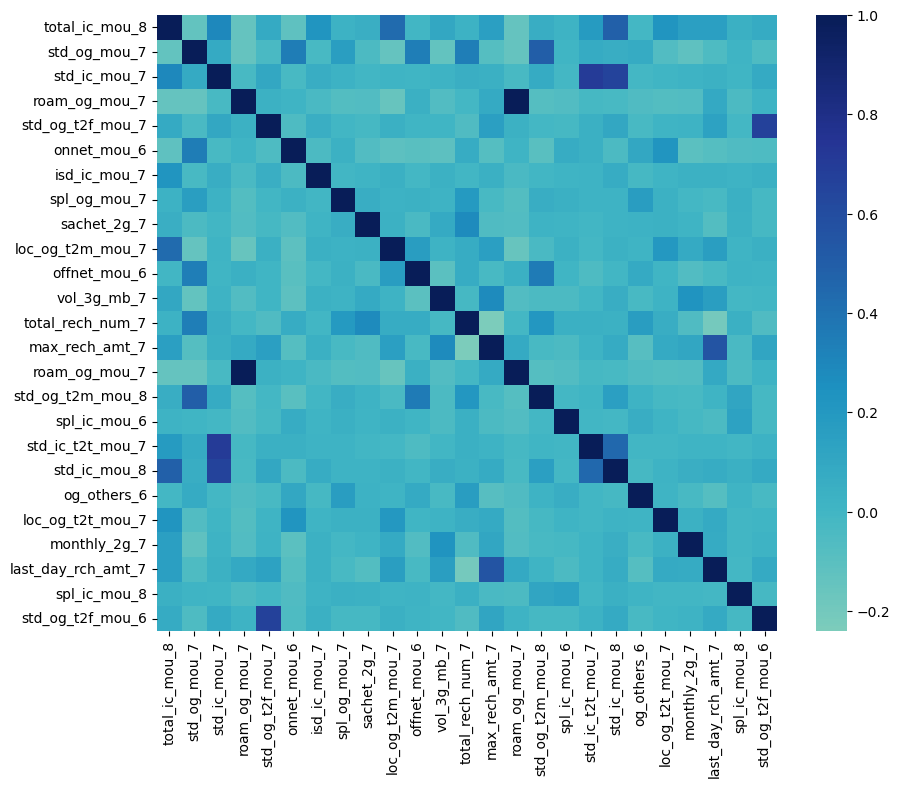

In [373]:
# plot heatmap for of the 25 features
plt.rcParams["figure.figsize"] =(10,8)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap='YlGnBu')
plt.show()

In [374]:
feature_importance['variables'][:10].to_list()

['total_ic_mou_8',
 'std_og_mou_7',
 'std_ic_mou_7',
 'roam_og_mou_7',
 'std_og_t2f_mou_7',
 'onnet_mou_6',
 'isd_ic_mou_7',
 'spl_og_mou_7',
 'sachet_2g_7',
 'loc_og_t2m_mou_7']

In [375]:
# fitting logistic regression model with top 10 features 
top_10 = feature_importance['variables'][:10].to_list()
X_train = X_train[top_10]
X_test = X_test[top_10]

In [376]:
# KFold object with 5 splits
k_fold = KFold(n_splits=5, shuffle=True, random_state=51)

# params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# setting score as recall for getting higher sensitivity
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc',
                        cv = k_fold, 
                        verbose = 1,
                        return_train_score=True) 

# model fit
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=51, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [377]:
# best hyperparameters
print("Best AUC: ", model_cv.best_score_)
print("Best hyperparameters: ", model_cv.best_params_)

Best AUC:  0.8940647808548361
Best hyperparameters:  {'C': 1000}


In [378]:
# predict churn on test dataset
y_test_pred = model_cv.predict(X_test)

# confusion matrix
conf_matrx = metrics.confusion_matrix(y_test, y_test_pred)
print(conf_matrx)

[[5055 1695]
 [  39  205]]


In [379]:
TP = conf_matrx[1,1] # true positive 
TN = conf_matrx[0,0] # true negative
FP = conf_matrx[0,1] # false positive
FN = conf_matrx[1,0] # false negative

In [380]:
# Accuracy
print("Accuracy ==> ",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity ==> ",TP / float(TP+FN))

# Specificity
print("Specificity ==> ", TN / float(TN+FP))

Accuracy ==>  0.7520732056048041
Sensitivity ==>  0.8401639344262295
Specificity ==>  0.7488888888888889


In [381]:
logreg_model = model_cv.best_estimator_

In [382]:
# intercept
intercept_df = pd.DataFrame(logreg_model.intercept_.reshape((1,1)), columns=['intercept'])


In [383]:
intercept_df

,intercept
0,-0.759652


In [384]:
# coefficients
coefficients = logreg_model.coef_.reshape((len(top_10), 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logreg_model.coef_, columns=logistic_features)


In [385]:
# merge dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,total_ic_mou_8,std_og_mou_7,std_ic_mou_7,roam_og_mou_7,std_og_t2f_mou_7,onnet_mou_6,isd_ic_mou_7,spl_og_mou_7,sachet_2g_7,loc_og_t2m_mou_7
0,-0.759652,-3.553787,0.280403,0.795762,0.535331,-0.167495,0.210286,0.026588,-0.08403,-0.242269,-0.276571


## Business Insights

1. Total Incoming Minutes of Usage (total_ic_mou_8): Business should consider strategies to encourage more incoming calls, such as attractive call packages or promotional offers.

2. STD Outgoing Minutes of Usage in August (std_og_mou_7): This implies that customers who make more STD outgoing calls in August tend to have a higher value or engagement with your business. Business should leverage this insight to offer targeted STD calling plans or special promotions during this period to encourage customer engagement.

3. STD Incoming Minutes of Usage in July (std_ic_mou_7): This indicates that customers who receive more STD incoming calls during this month tend to have a higher value or engagement. Business can focus on enhancing customer experience for STD incoming calls, such as providing better call quality, reliable connections, and attractive STD incoming call packages.

4. Roaming Outgoing Minutes of Usage in July (roam_og_mou_7): It indicates that customers who make more outgoing calls while in roaming during this month tend to be more valuable. Business should consider providing special roaming offers, affordable international calling rates, or tailored packages to cater to the needs of customers who frequently travel or use roaming services.

5. On-net Minutes of Usage in June (onnet_mou_6): Business may want to investigate and find ways to encourage customers to diversify their calling patterns or explore other services within the business.

6. STD Outgoing Minutes of Usage to Fixed Lines in August (std_og_t2f_mou_7): Business should analyze strategies to improve the value proposition for customers making STD calls to fixed lines, such as offering bundled packages or discounted rates for these types of calls.

7. ISD Incoming Minutes of Usage in July (isd_ic_mou_7): This indicates that customers who receive more ISD incoming calls during this month tend to have a higher value or engagement. Consider offering attractive ISD incoming call plans, competitive international calling rates, or promotions to cater to the needs of customers with international connections.

8. Local Outgoing Minutes of Usage to Other Operator Mobiles in July (loc_og_t2m_mou_7): Business should consider strategies to improve the attractiveness of your local outgoing call offerings to customers using other operator mobiles. This could include competitive pricing, value-added services, or targeted marketing campaigns.

9. Special Outgoing Minutes of Usage in July (spl_og_mou_7): Consider evaluating the nature and purpose of these special outgoing calls and identifying ways to enhance their value or relevance for customers. Business could introduce customized special call packages, exclusive features, or discounts to encourage customers to make more special outgoing calls.

10. 2G Sachet Recharge in July (sachet_2g_7): This suggests that customers who opt for 2G sachet recharges during this month tend to have a lower value or engagement. Business may want to analyze the reasons behind this trend and consider promoting higher-speed data services or encouraging customers to upgrade to more advanced data plans.